## Data cleansing 1차 진행
- 요식업만 분류
- 업태명 오탈자 재 분류  

In [9]:
# Import module and raw dataset
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter


# 한글 폰트 사용을 위해서 세팅
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)


tran_full = pd.read_csv('../../resources/rawdata/거래데이터_full.csv')
shop_info19 = pd.read_excel('../../resources/rawdata/매장데이터_수정.xls')

C:\Users\dksle\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (5,9) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [6]:
# rawdata's shape
print('Raw data shape of transaction : ', tran_full.shape)
print('Raw data shape of shop info : ', shop_info19.shape)

Raw data shape of transaction :  (5884248, 12)
Raw data shape of shop info :  (2411, 9)


In [7]:
shop_info19

,매장코드,매장명,매장주소,본사코드,본사명,업태명,종목명,상포명,구분
0,S05987,미소야 개포점,서울특별시 강남구 개포동,H132,(주)보우앤파트너스,음식,분식,미소야 개포점,식당
1,S06024,포메인수서점,서울특별시 강남구 광평로51길 6-11,H154,(주) 에스알인베스,음식,베트남쌀국수,포메인수서점,식당
2,S06249,미소야 일원점,서울특별시 강남구 일원동,H132,(주)보우앤파트너스,음식,분식,미소야 일원점,식당
3,S06883,버드나무집(역삼점),서울특별시 강남구 역삼동,H156,버드나무집,음식,한식,버드나무집(역삼점),식당
4,S07185,미소야 대치점,서울특별시 강남구 대치동,H132,(주)보우앤파트너스,음식,간이음식,미소야 대치점,식당
...,...,...,...,...,...,...,...,...,...
2406,U13785,주식회사 바잇미,서울 강남구 신사동 517-31,0000,단독매장,기타,기타,카페 바잇미,카페
2407,U13883,탠커피앤비어,서울 강남구 강남대로102길 13 (역삼동),0000,단독매장,음식,커피,탠커피앤비어,식당
2408,U14017,의정부오뎅부대찌개(청담점),서울 강남구 청담동 131-10,0000,단독매장,음식,한식,의정부오뎅부대찌개(청담점),식당
2409,U14189,주식회사핑크컬쳐,서울 강남구 강남대로156길 46 (신사동),0000,단독매장,서비스업,전문디자인업,주식회사핑크컬쳐,비식당


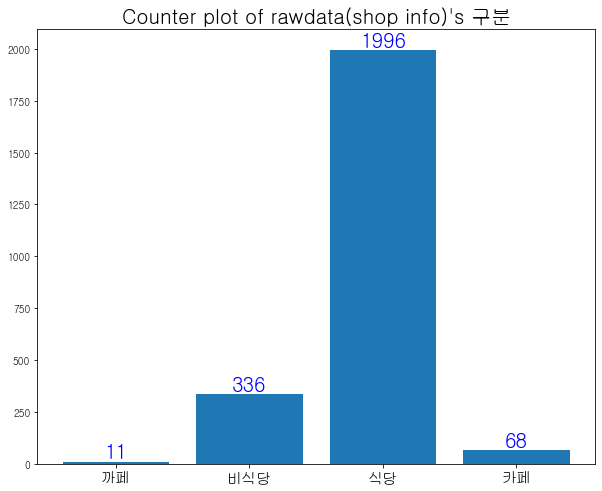

In [27]:
# rawdata's counter plot (구분)
data = Counter(shop_info19['구분'])
myList = data.items()
myList = sorted(myList) 
x, y = zip(*myList)

plt.figure(figsize=(10,8)) 
plt.bar(x, y)
plt.xticks(fontsize = 15)

for i, v in enumerate(x):
    plt.text(v, y[i], y[i],                 # 좌표 (x축 = v, y축 = y[0]..y[1], 표시 = y[0]..y[1])
             fontsize = 20, 
             color='blue',
             horizontalalignment='center',  # horizontalalignment (left, center, right)
             verticalalignment='bottom')    # verticalalignment (top, center, bottom)
    
plt.title("Counter plot of rawdata(shop info)'s 구분", fontsize=20)

#save_dir = '../plot/' + sheets_names[i] +' rawdata counters'
#plt.savefig(save_dir + '.png')
plt.show()

In [43]:

labels

array(['음식', '한식점업', '분식', '음식점업', '건강식품,화장품', '한식', '휴게음식점', '한식음식',
       '요식', '요식업소', '커피샵', '도*소매', '소매', '신용카드', '서비스', '도소매', '커피',
       '기타', '화장품', '음식/서비스', '외식', '소매업', '정통양식', '음식점', '도소매업',
       '음식및숙박업', '협회및단체', '요식업', '일반음식', '음식업', '주점', '커피전문점',
       '패스트푸드및식음료', '일반음식점', '음식업,요식업', '패스트푸드', '제조', '외식업', '요식업,주점',
       '도,소매', '학원', '패스트푸드 및 식음료', '음숙', '휴게음식', '음석점업', '제과점', '비영리',
       '식품접객업', '일반', '베이글 샌드위치', '족발', '가구', '음식 외', '.', '도소매(유통업)',
       '교육서비스', '카페', '서비스업', '치킨', '제조. 서비스', '제조,서비스', '보건업', '의류',
       '도매', '도매업', '도매및소매업', '식품', '임대', '부동산업', '축산', '카드단말기', '휴게음식업',
       '서비스, 도소매', '음료식품', '식당', '음료', '잡화 ', '카페,애견', '음식,소매', '음식점업도소매',
       '1', '뷰티', '음식업점', ' 도소매', '일반음식점업', '매점', '일식', '베이커리', '휴게음식점업',
       '레스토랑', '도매및소매', '레져', '휴계음식', '커피숍', '도소매/음식', '숙박및음식점업', '경양식',
       '도소매,음식', '음식.도소매', '의료', '맥주', '음료,식품', '제조, 도소므', '도매 및 소매업',
       '도매소매업', '음식접업', '제조업', '숙박 및 음식점업', '음심점', '일반음료', '음식,소매,서비스',
       

In [ ]:
# rawdata's counter plot (업태명)
data = Counter(shop_info19['업태명'])
myList = data.items()
myList = sorted(myList) 
x, y = zip(*myList)

plt.figure(figsize=(20,8)) 
plt.pie(y, labels=x)
plt.legend()


# for i, v in enumerate(x):
#     plt.text(v, y[i], y[i],                 # 좌표 (x축 = v, y축 = y[0]..y[1], 표시 = y[0]..y[1])
#              fontsize = 20, 
#              color='blue',
#              horizontalalignment='center',  # horizontalalignment (left, center, right)
#              verticalalignment='bottom')    # verticalalignment (top, center, bottom)
    
# plt.title("Counter plot of rawdata(shop info)'s 업태명", fontsize=20)

# #save_dir = '../plot/' + sheets_names[i] +' rawdata counters'
# #plt.savefig(save_dir + '.png')
plt.show()

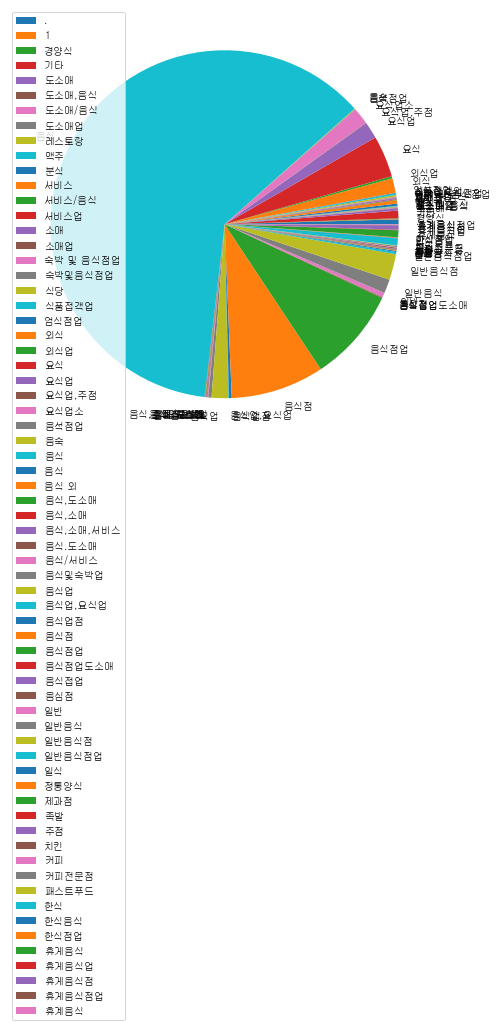

In [122]:
# rawdata's counter plot (업태명)
data = Counter(shop_info19[shop_info19['구분'] == '식당']['업태명'])
myList = data.items()
myList = sorted(myList) 
x, y = zip(*myList)

plt.figure(figsize=(20,8)) 
plt.pie(y, labels=x)
plt.legend()


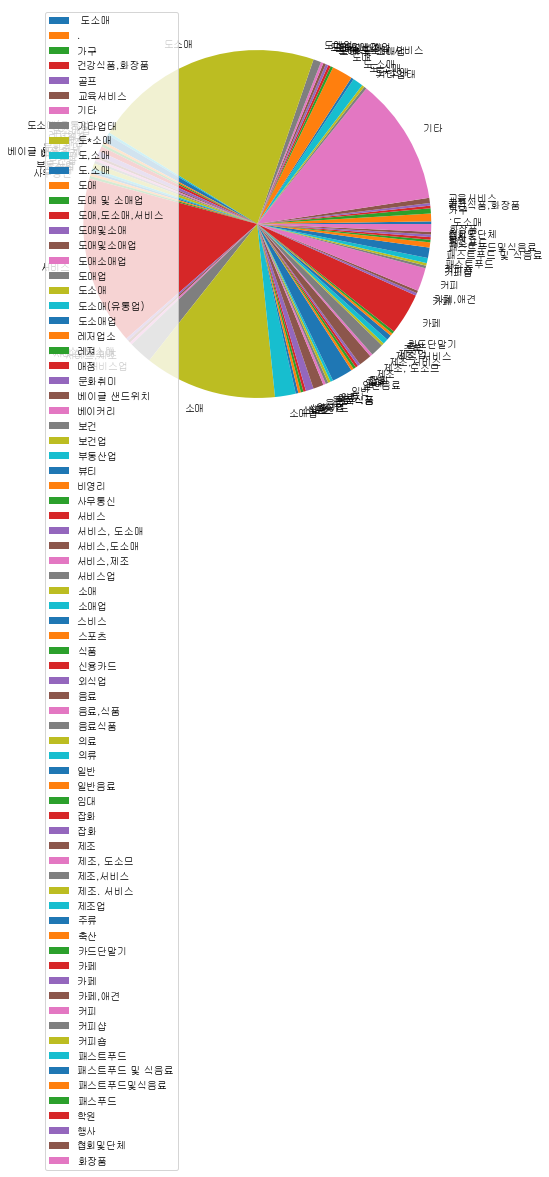

In [127]:
# rawdata's counter plot (업태명)
data = Counter(shop_info19[shop_info19['구분'] != '식당']['업태명'])
myList = data.items()
myList = sorted(myList) 
x, y = zip(*myList)

plt.figure(figsize=(20,8)) 
plt.pie(y, labels=x)
plt.legend()


In [51]:
shop_info19_dropped = shop_info19[shop_info19['구분']!='비식당']
shop_info19_dropped.shape

print(shop_info19_dropped[shop_info19_dropped['구분']!='식당']['업태명'].unique())
print(shop_info19_dropped[shop_info19_dropped['구분']=='식당']['업태명'].unique())

['커피샵' '커피' '패스트푸드및식음료' '패스트푸드 및 식음료' '베이글 샌드위치' '서비스' '카페' '기타' '도소매'
 '음료식품' '음료' '.' '카페,애견' '소매' '일반' '커피숍' '외식업' '도매' '음료,식품' '일반음료' '패스푸드'
 '서비스업' '카페 ' '패스트푸드' '소매업']
['음식' '한식점업' '분식' '음식점업' '한식' '휴게음식점' '한식음식' '요식' '요식업소' '서비스' '음식/서비스'
 '외식' '정통양식' '음식점' '음식및숙박업' '요식업' '일반음식' '음식업' '주점' '커피전문점' '일반음식점'
 '음식업,요식업' '패스트푸드' '기타' '외식업' '요식업,주점' '음숙' '휴게음식' '도소매업' '음석점업' '제과점'
 '식품접객업' '일반' '족발' '음식 외' '.' '치킨' '휴게음식업' '식당' '음식,소매' '음식점업도소매' '1'
 '음식업점' '일반음식점업' '일식' '휴게음식점업' '레스토랑' '휴계음식' '소매' '도소매/음식' '숙박및음식점업'
 '서비스업' '도소매' '경양식' '도소매,음식' '음식.도소매' '커피' '맥주' '소매업' '음식접업' '숙박 및 음식점업'
 '음심점' '음식,소매,서비스' '음식,도소매' '음식 ' '엄식점업' '서비스/음식']


In [56]:
query = (shop_info19_dropped['업태명']=='서비스업') | (shop_info19_dropped['업태명']=='도소매')
shop_info19_dropped[query]

,매장코드,매장명,매장주소,본사코드,본사명,업태명,종목명,상포명,구분
750,T02446,바디프랜드(카페),"서울 강남구 양재천로 163 (도곡동, 바디프랜드 도곡타워)",HGUQ,바디프랜드,도소매,카페,바디프랜드(카페),카페
1235,T43390,바디프랜드(B&B),"서울 강남구 양재천로 163 (도곡동, 바디프랜드 도곡타워)",HGUQ,바디프랜드,도소매,카페,바디프랜드(B&B),카페
1374,T53292,카페하품(Hapoom) 강남본점,서울 강남구 테헤란로5길 51-13 (역삼동),0000,단독매장,서비스업,휴게음식점업,카페하품/(주)스파이카,식당
1379,T53596,하루비,"서울 강남구 테헤란로107길 6 (삼성동, 두양빌딩)",0000,단독매장,도소매,음식,하루비,식당
1445,T58468,독베이커리,서울 강남구 강남대로120길 48 (논현동),0000,단독매장,도소매,애견간식,독베이커리,식당
1610,T69897,(주)비아인키노(카페),서울 강남구 선릉로 741 (논현동),0000,단독매장,도소매,서적,(주)비아인키노(카페),카페
1992,T92536,덮꼬모밀,"서울 강남구 테헤란로 322 (역삼동, 한신인터밸리24빌딩)",0000,단독매장,도소매,음식,덮꼬모밀,식당
1997,T92765,모소리,서울 강남구 도산대로1길 24 (신사동),0000,단독매장,도소매,한식,주식회사 서울스토리,식당
2044,T95048,카페 콤마스(Cafe COMMAS),"서울 강남구 선릉로86길 15 (대치동, 현대선릉 GOLD TOWER)",0000,단독매장,서비스업,힐링카페,COMMAS 힐링카페,카페
2105,T99015,킨더가든포독,"서울 강남구 강남대로114길 33 (논현동, 네트빌)",0000,단독매장,도소매,애완동물카페,킨더가든포독,카페


In [121]:
shop_info19_dropped.loc[shop_info19_dropped['구분']!='식당','구분'] = '카페'
# shop_info19_dropped['구분'].unique()

# shop_info19_dropped[shop_info19_dropped['구분']=='식당']['업태명'].unique()

shop_info19_dropped[shop_info19_dropped['구분']=='카페']['업태명'].unique()

<ipython-input-121-dc781e23f135>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shop_info19_dropped.loc[shop_info19_dropped['구분']!='식당','구분'] = '카페'


array(['커피샵', '커피', '커피전문점', '패스트푸드및식음료', '패스트푸드 및 식음료', '베이글 샌드위치',
       '서비스', '카페', '기타', '도소매', '음료식품', '음료', '.', '카페,애견', '소매', '일반',
       '커피숍', '외식업', '도매', '음료,식품', '일반음료', '패스푸드', '서비스업', '카페 ',
       '패스트푸드', '소매업'], dtype=object)

In [117]:
# 1. 한식이 들어가면 한식으로 재 분류
idl = shop_info19_dropped[shop_info19_dropped['업태명'].str.contains('한식')].index
shop_info19_dropped.loc[idl,'업태명'] = '한식'
shop_info19_dropped.loc[idl]

# 2. 휴게 음식점 재 분류
idl2 = shop_info19_dropped[shop_info19_dropped['업태명'].str.contains('휴계')|shop_info19_dropped['업태명'].str.contains('휴게')].index
shop_info19_dropped.loc[idl2,'업태명'] = '휴게음식점'
shop_info19_dropped.loc[idl2]

# 3. 음숙/음심/음석/엄식/음식 -> 음식점으로 재 분류
keywords = ['음숙','음심','음석','엄식','음식접']
query = '|'.join(keywords)
idl3 = shop_info19_dropped[shop_info19_dropped['업태명'].str.contains(query)].index

shop_info19_dropped.loc[idl3,'업태명'] = '음식점'
shop_info19_dropped.loc[idl3]

# 4. 커피 전문점 / 커피 -> 카페로 구분
idl4 = shop_info19_dropped[shop_info19_dropped['업태명'].str.contains('커피')].index
shop_info19_dropped.loc[idl4,'구분'] = '카페'
shop_info19_dropped.loc[idl4]

# 5. 식당 내 패스트푸드점 1건 처리 -> 일반음식점 
idl5 = shop_info19_dropped[(shop_info19_dropped['구분']=='식당') & (shop_info19_dropped['업태명']=='패스트푸드')].index
shop_info19_dropped.loc[idl5,'업태명'] = '일반음식점'
shop_info19_dropped.loc[idl5]

# 6. 일식, 치킨, 중식, 제과점, 족발 종목명 확인
keywords = ['일식','치킨','중식','제과점','족발']
query = '|'.join(keywords)
shop_info19_dropped[shop_info19_dropped['업태명'].str.contains(query)]

# keywords = ['일식','치킨','중식','제과점','족발']
# query = '|'.join(keywords)
# shop_info19_dropped[shop_info19_dropped['종목명'].str.contains(query)]

C:\Users\dksle\anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-117-2dbc60a1702d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shop_info19_dropped.loc[idl,'업태명'] = '한식'
<ipython-input-117-2dbc60a1702d>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shop_info19_dropped.loc[idl2,'업태명'] = '휴게음식점'
<ipython-input-117-2dbc60a

,매장코드,매장명,매장주소,본사코드,본사명,업태명,종목명,상포명,구분
342,S64066,빠삐뚜앱(논현),서울 강남구 논현동,0000,단독매장,제과점,음식,빠삐뚜앱,식당
444,S74932,마왕족발(삼성점),서울 강남구 선릉로130길 56 (삼성동),HEQH,마왕족발,족발,족발,마왕족발(삼성점),식당
607,S89582,꿍닭꿍닭,서울 강남구 남부순환로363길 15 (도곡동),0000,단독매장,치킨,치킨,꿍닭꿍닭,식당
1052,T28239,가츠규 신논현점,서울 강남구 강남대로 442 (역삼동),HIJE,(주)스타럭스,일식,음식,가츠규 신논현점,식당
1825,T83305,미타야,서울 강남구 강남대로94길 27 (역삼동),0000,단독매장,일식,일식,미타야,식당
2261,U06682,치킨뱅이.삼성2동점,서울 강남구 선릉로112길 21 (삼성동),0000,단독매장,치킨,치킨,치킨뱅이,식당


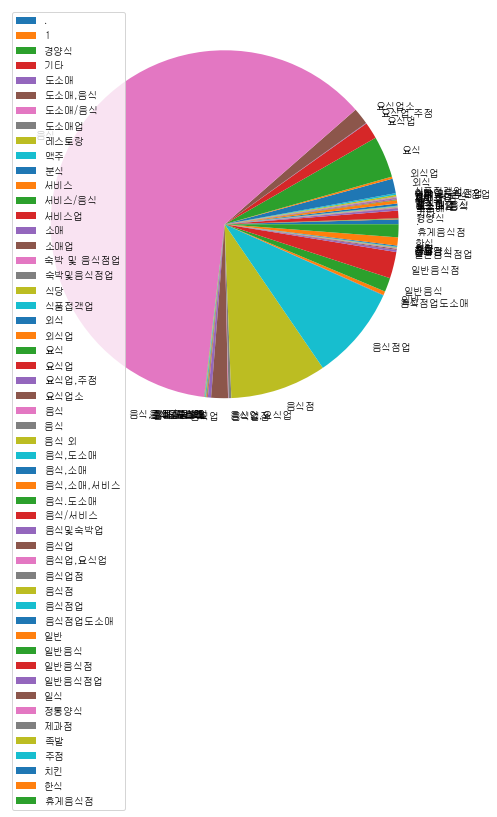

In [123]:
# 1차 클렌징 후 식당 구분 내 counter plot (업태명)
data = Counter(shop_info19_dropped[shop_info19_dropped['구분']=='식당']['업태명'])
myList = data.items()
myList = sorted(myList) 
x, y = zip(*myList)

plt.figure(figsize=(20,8)) 
plt.pie(y, labels=x)
plt.legend()


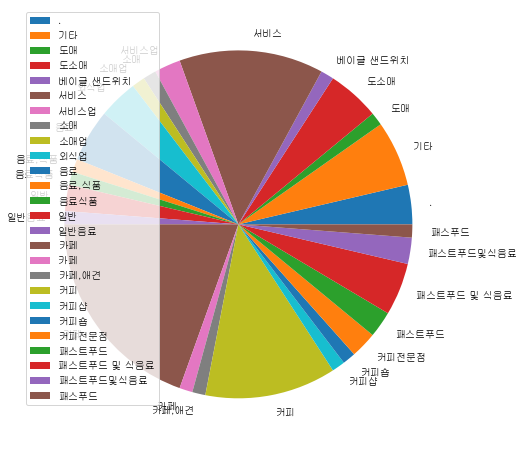

In [128]:
# 1차 클렌징 후 카페 구분 내 counter plot (업태명)
data = Counter(shop_info19_dropped[shop_info19_dropped['구분']!='식당']['업태명'])
myList = data.items()
myList = sorted(myList) 
x, y = zip(*myList)

plt.figure(figsize=(20,8)) 
plt.pie(y, labels=x)
plt.legend()

In [125]:
shop_info19_dropped.to_csv('../resources/cleansedData/shopInfo_cleansed_ver1_220215.csv', index=False)

In [116]:
print(shop_info19_dropped[shop_info19_dropped['구분']=='식당']['종목명'].unique())

keywords = ['커피','카페','주스']
query = '|'.join(keywords)
shop_info19_dropped[(shop_info19_dropped['구분']=='식당') & (shop_info19_dropped['종목명'].str.contains(query))]['종목명'].unique()
# shop_info19_dropped[shop_info19_dropped['구분']=='식당']['종목명'].unique()

['분식' '베트남쌀국수' '한식' '간이음식' '음식업' '음식' '커피' '치킨' '일식' '호프전문점' '일반음식' '한식점업'
 '참치' '휴게음식점' '까페' '경양식' '인도요리' '빠' '양식' '커피숍' '기타주점' '감자탕' '휴게음식'
 '일반음식,외식관련이벤트등' '치킨호프' '퓨전요리' '일반음식점' '카페' '중식' '제과점' '중식(양꼬치)' '커피전문점'
 '레스토랑' '요식기타' '서양음식점' '서양음식' '기타' '호프,치킨' '치킨,호프' '주점' '간이주점' '호프' '바'
 '수제버거' '음료/주류 커피전문' '햄버거/샌드위치' '치킨/닭요리' '빵' '토스트' '음식점,한식' '커피.음료' '요식업'
 '식당' '피자' '외식' '베트남음식' '음식점' '일반음식점업' '한식업' '초밥전문점' '설렁탕' '중국음식' '스테이크소스'
 '음식,와인' '스낵' '펍' '한식 음식업점' '요식' '제과' '식품접객업' '테이크아웃 커피' '케익' '커피,쥬스' '음료'
 '서양' '족발' '도시락' '중식 외' '샌드위치등' '일반한식' '기타서양식주점' '쥬스' '.' '커피.차' '일반'
 '샌드위치' '파이' '일식음식점' '케익전문점' '스페인레스토랑' '한방차' '포차' '일식음식점업' '한식.프랜차이즈' '주스'
 '쥬스,커피' '한식음식점' '서양음식점업' '육류' '호프 치킨' '일반주점' '서양식' '한깃' '전통주' '호프집'
 '중화요리' '선술집' '초콜릿 카페' '빙수' '베이커리' '서양식음식점업' '와인레스토랑' '조개구이삼겹살' '맥주'
 '기타 주점업' '커피,과일' '과일쥬스' '카페커피,식자재' '와인' '기타 주점' '고로케' '1' '김치찌개' '타코야끼'
 '유흥주점' '인도, 파키스탄,할랄' '일반 음식점' '한식족발' '한식,중식,양식' '해산물,일식' '양식(인도)' '서양식주점'
 '간이음식점' '프랜차이즈' '과일주스' '비알콜 음료점업' '중국집' '음식점업' '분식,카페' '인

array(['커피', '커피숍', '카페', '커피전문점', '음료/주류 커피전문', '커피.음료', '테이크아웃 커피',
       '커피,쥬스', '커피.차', '주스', '쥬스,커피', '초콜릿 카페', '커피,과일', '카페커피,식자재',
       '과일주스', '분식,카페', '커피점', '커피,샌드위치', '꽃,커피숍', '커피 음료', '커피,샐러드',
       '커피,제과', '커피쥬스음료', '치킨,카페(두유,커피)', '커피전문', '커피,생화,플라워레슨',
       '카페,애견용품', '커피및간이음식', '카페, 제과점', '과일채소주스', '와인카페', '카페,식사', '카페&펍',
       '애견카페/일반음식'], dtype=object)

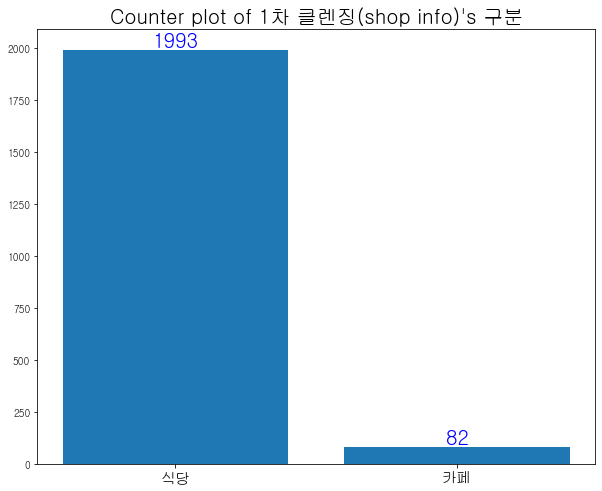

In [119]:
# rawdata's counter plot (구분)
data = Counter(shop_info19_dropped['구분'])
myList = data.items()
myList = sorted(myList) 
x, y = zip(*myList)

plt.figure(figsize=(10,8)) 
plt.bar(x, y)
plt.xticks(fontsize = 15)

for i, v in enumerate(x):
    plt.text(v, y[i], y[i],                 # 좌표 (x축 = v, y축 = y[0]..y[1], 표시 = y[0]..y[1])
             fontsize = 20, 
             color='blue',
             horizontalalignment='center',  # horizontalalignment (left, center, right)
             verticalalignment='bottom')    # verticalalignment (top, center, bottom)
    
plt.title("Counter plot of 1차 클렌징(shop info)'s 구분", fontsize=20)

#save_dir = '../plot/' + sheets_names[i] +' rawdata counters'
#plt.savefig(save_dir + '.png')
plt.show()